<a href="https://colab.research.google.com/github/classofai/DLND/blob/master/mnist_mlp_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Layer Perceptron, MNIST
---
In this notebook, we will train an MLP to classify images from the [MNIST database]

(http://yann.lecun.com/exdb/mnist/) hand-written digit database.

The process will be broken down into following steps:
>1. Load and visualize the data
2. Define Neural network
3. Train the model
4. Evaluate the performance of our trained model on test dataset!

Before we begin, we have to import the necessary libraries for working with data and PyTorch

In [0]:
# import libraries
import torch
import numpy as np

## Load and visualize the [Data](http://pytorch.org/docs/stable/torchvision/datasets.html)

Downloading may take a few moments, and you should see your progress as the data is loading.You may also choose to change the `batch_size` if you want to load more data at a time.

This cell will create Dataloaders for each of our datasets.

In [3]:
from torchvision import datasets, transforms

# number of subprocess to use for data loading
num_workers = 0

# how many samples per batch to load
batch_size = 20

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose training and test datasets
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)

test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

# prepare data loaders 
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)



0it [00:00, ?it/s]

9920512it [00:01, 7793400.48it/s]                            


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 124558.03it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 2073364.09it/s]                           
0it [00:00, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 46571.92it/s]            


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


###  Visualize a Batch of Training Data

The first step in a classification task is to take a look at the data, make sure it is loaded in correctly,  then make any initial observations about patterns in that data

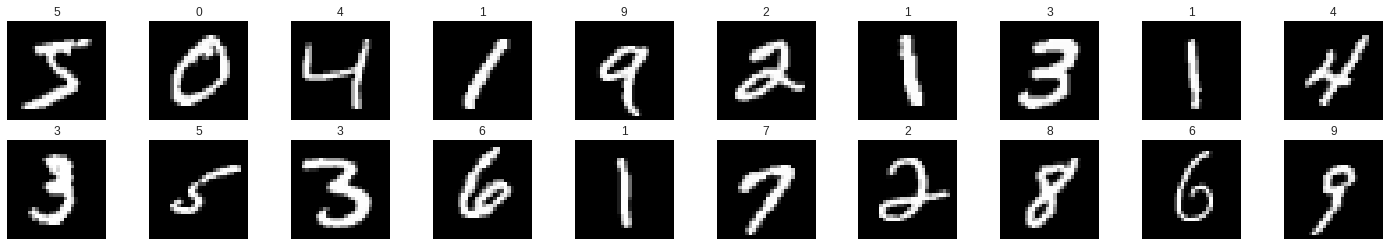

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .items() gets the value containeed in a container
    ax.set_title(str(labels[idx].item()))